# DBSCAN (Density-Based Spatial Clustering of Applications with Noise)

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is an unsupervised machine learning algorithm that is typically used for clustering tasks. 
It was proposed by `Martin Ester, Hans-Peter Kriegel, Jörg Sander, and Xiaowei Xu in 1996`.

## **Key Concepts of DBSCAN**

**`Density:`** In the context of DBSCAN, density is defined as the number of points within a specified radius (ϵ).

**`Direct Density Reachable:`** A point A is directly density reachable from a point B if A is within the ϵ distance from B and B has sufficient number of points in its neighbors which is more than a certain threshold points (MinPts).

**`Density Reachable:`** A point A is density reachable from a point B if there is a sequence of points P1, P2,...,Pn, P1 = B, Pn = A such that Pi+1 is directly density reachable from Pi.

**`Density Connected:`** A point A is density connected to a point B if there is a point C such that both A and B are density reachable from C.


## **Steps of the DBSCAN Algorithm**

### **Step 1:**
The algorithm starts with an arbitrary starting point that has not been visited. The neighborhood of this point is extracted using a `distance ϵ (eps)` and if it contains sufficiently `many points (MinPts)`, a new cluster is started.

### **Step 2:**
The algorithm then iteratively continues, considering each point within the neighborhood (starting with the original point), and if this point also has a sufficient number of points within its neighborhood, the cluster is expanded to include this point and its neighborhood points. If the point does not have a sufficient number of points within its neighborhood, `the point is labeled as noise (it does not belong to any cluster)`.

### **Step 3:**
The process continues until the density-connected cluster is completely found. The algorithm then proceeds to the next unvisited point in the database and repeats the process until all points have been visited, resulting in a complete segmentation of the data into clusters, with outliers marked as noise.

### **Advantages of DBSCAN**

* It can find arbitrary shaped clusters. It can even find a cluster completely surrounded by a different cluster.
* It has a notion of noise, and is robust to outliers.
* It does not require one to specify the number of clusters such as in k-means.
* It performs well with large datasets.

### **Disadvantages of DBSCAN**

* It is not entirely deterministic: border points that are reachable from two clusters can be part of either cluster, depending on the order the data is processed.
* It has trouble finding clusters of varying density.
* It is sensitive to the parameters, and it's not always easy to choose an appropriate value for **`ϵ and MinPts`**.


# **Paramters**

**DBSCAN works on the principle of density connectivity. It uses two parameters:**

**`ε (eps):`** This is the distance threshold within which to search for nearby neighbors.

**`MinPts:`** This is the minimum number of data points needed to form a dense region.

The algorithm starts by picking an arbitrary point in the dataset. If there are at least MinPts within a radius of ε from that point, a new cluster is created, and the point is marked as a core point. Points within the ε radius are added to the cluster. For each point within the ε radius, if there are MinPts within a radius of ε from that point, those points are also added to the cluster. This process continues until there are no more points within the ε radius. The algorithm then proceeds with the next arbitrary unvisited point.

**The DBSCAN algorithm classifies data points into three categories:**

**`Core points:`** A point is a core point if there are at least MinPts within ε distance from this point.

**`Border points:`** A point is a border point if it is reachable from a core point and there are less than MinPts within ε distance from this point.

**`Noise or outlier points:`** A point is an outlier if it is neither a core point nor a border point.


## **Points:**

1. **`Core points:`** A point is a core point if there are at least MinPts within ε distance from this point.
2. **`Border points:`** A point is a border point if it is reachable from a core point and there are less than MinPts within ε distance from this point.
3. **`Noise or outlier points:`** A point is an outlier if it is neither a core point nor a border point.



<img src="https://miro.medium.com/v2/resize:fit:640/format:webp/0*jMhXpsJCe7ZEj0KB.png" alt="gassian distribution" width="50%">



For locating data points in space, DBSCAN uses `Euclidean distance`, although other methods can also be used (like great circle distance for geographical data). It also needs to scan through the entire dataset once, whereas in other algorithms we have to do it multiple times.


# DBSCAN EXAMPLE

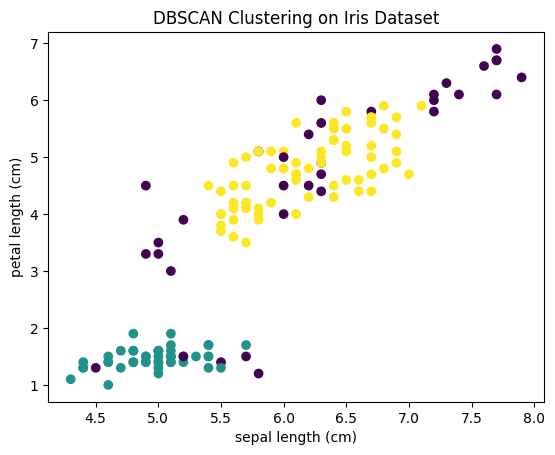

In [4]:
# importing libraties
from sklearn.datasets import load_iris
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# load the dataset
iris = load_iris()
X = iris.data
# here is to scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# call the dbscan algorithem
dbscan = DBSCAN(eps=.5,min_samples=5)

# fit the model on X
dbscan.fit(X_scaled)

# Plot the data points with color-coded clusters
plt.scatter(X[:, 0], X[:, 2], c=dbscan.labels_)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[2])
plt.title("DBSCAN Clustering on Iris Dataset")
plt.show()